# CP1 3.Übung Blatt2 Abgabe Lapp & Brieden
#### erstellt von Tobias Lapp und Sven Brieden am 12.11.2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
import scipy.constants as constants
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 4.0)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 16

# Aufgabe 3.1

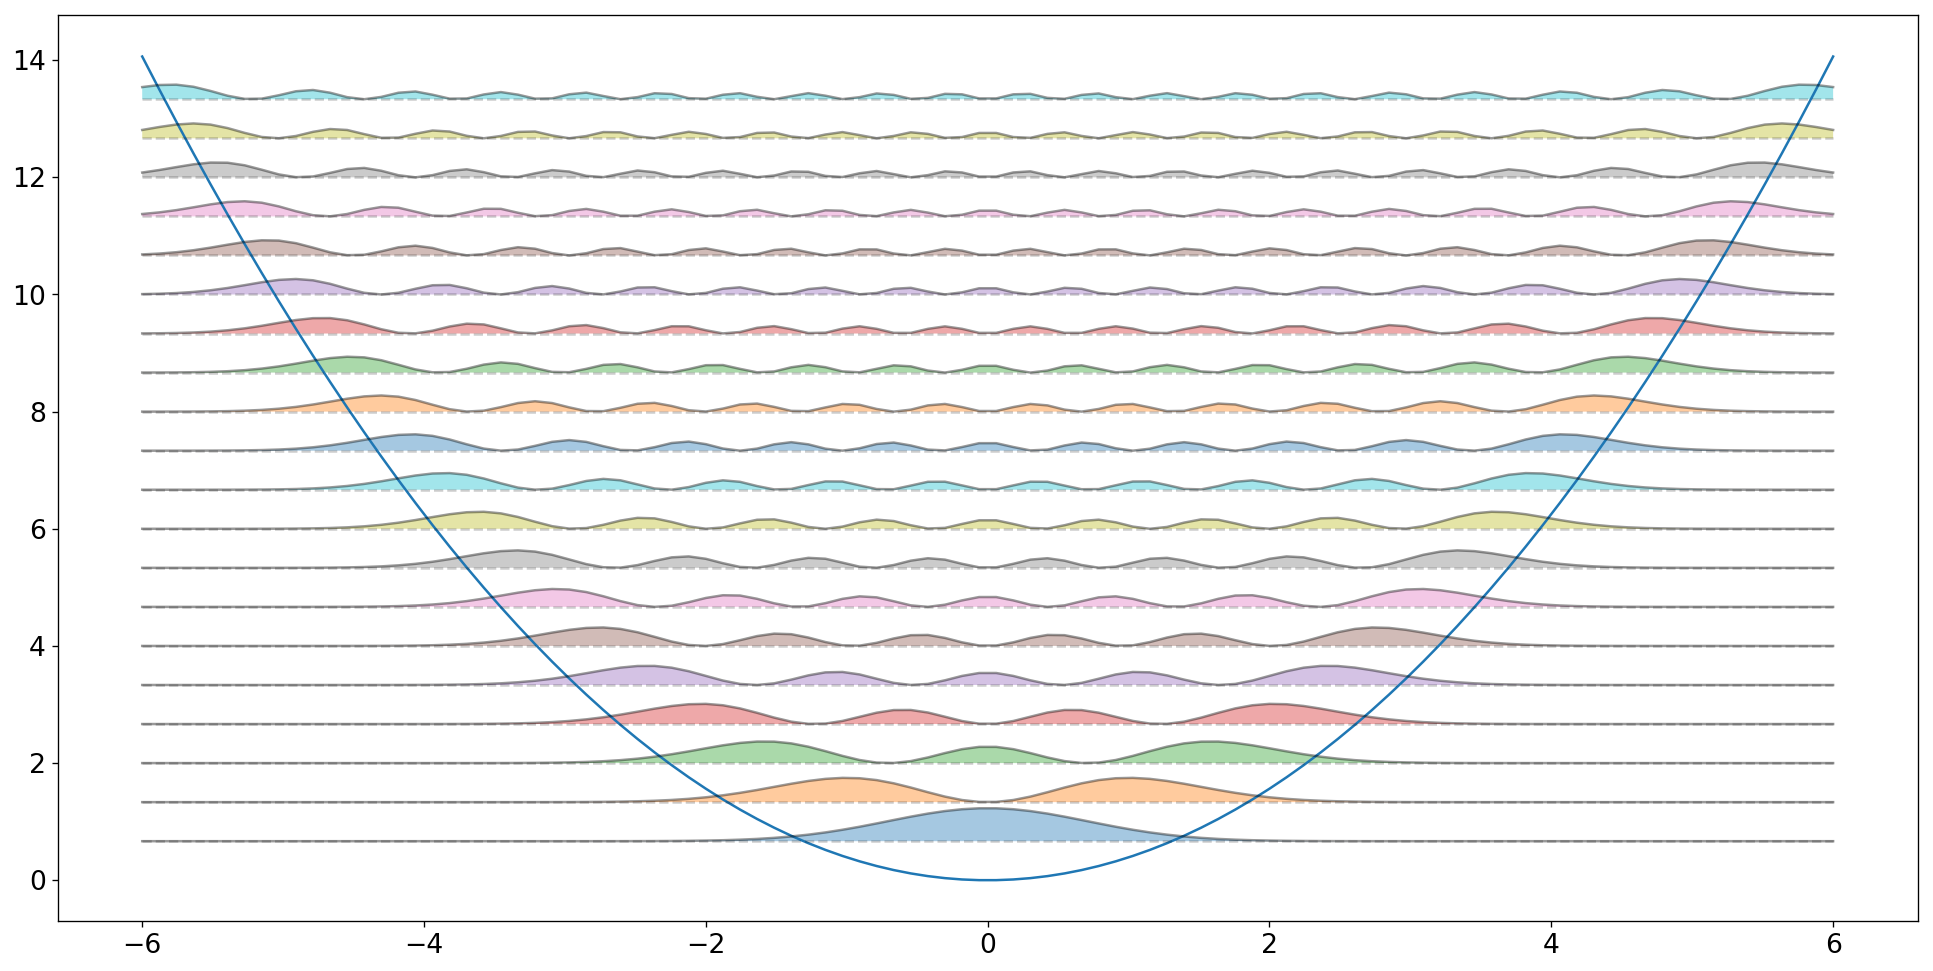

In [37]:
h_bar = constants.hbar
m = 1
a = lambda ω: np.sqrt(h_bar/(m*ω))
c = lambda n: np.sqrt(np.pi) * 2**n * np.math.factorial(n)
ψ = lambda n,x: 1 / np.sqrt(c(n)) * H(n,x) * np.exp(-x**2 / 2)

def H(n,x):
    if n<1:
        return 1 + 0 * x
    else:
        return 2 * x * H(n-1,x) - 2 * (n - 1) * H(n-2,x)
x = np.linspace(-6, 6,100)
plt.figure(figsize = (20,10))
plt.plot(x, (x/1.6)**2)
for n in range(20):
    plt.fill_between(x,ψ(n,x)**2 + (n + 1)/1.5, (n + 1)/1.5, alpha = 0.4)
    plt.plot(x,ψ(n,x)**2 + (n + 1)/1.5,c="black", alpha = 0.4)
    plt.plot(x,x*0+(n + 1)/1.5, "--", c="black", alpha = 0.2)
plt.show()

## Aufgabe 3.2


In [3]:
θ = lambda I: constants.hbar**2 / (2 * I * k_B)
z = lambda T: sum[(2 * J + 1) * np.exp(-J * (J + 1) * θ / T)]
U = lambda T: k * T**2 * np.gradient(np.log(Z(T)))
C_R = lambda T: dU(T)/dT

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


Temperatur   Z(T)(numerisch)    Z(T)(analytisch)
  0                  nan                  0.0
 10              3.80504              3.45124
 20              7.24575              6.90248
 30              10.6936              10.3537
 40              14.1432              13.8049
 50              17.5934              17.2562
 60              21.0440              20.7074
 70              24.4948              24.1587
 80              27.9457              27.6099
 90              31.3966              31.0611
100              34.8477              34.5124
110              38.2987              37.9636
120              41.7498              41.4149
130              45.2009              44.8661
140              48.6521              48.3174
150              52.1032              51.7686
160              55.5544              55.2198
170              59.0056              58.6711
180              62.4567              62.1223
190              65.9079              65.5736
200              69.3591       

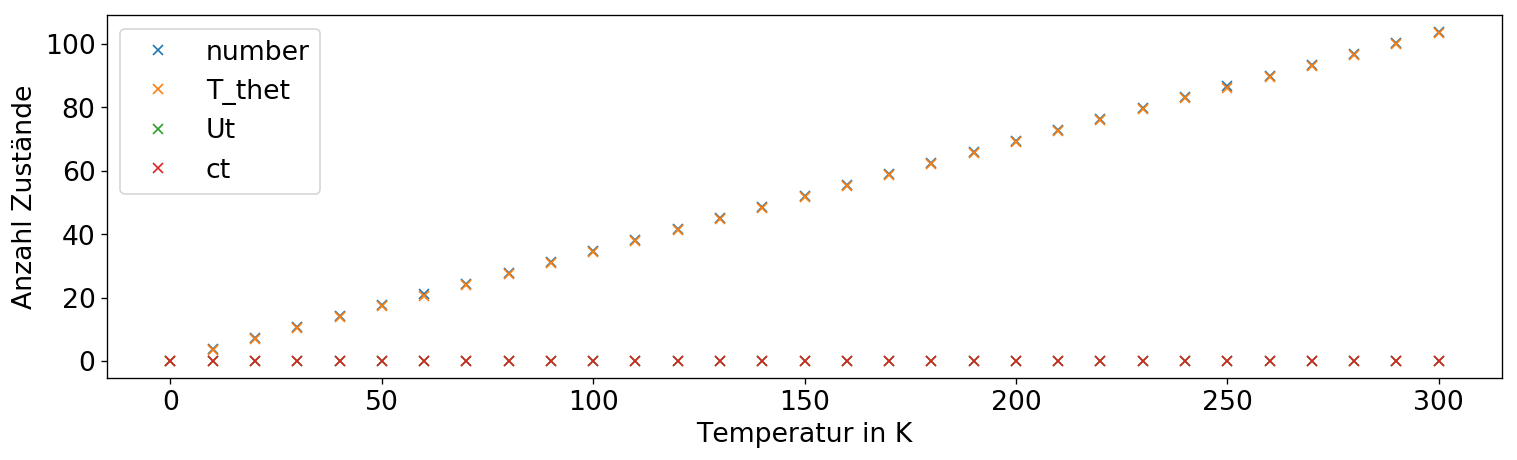

In [46]:
def number_rot(T,I):
    sigma = 0
    J = 0
    summand =1
    thet = (constants.hbar**2)/(2*I*constants.Boltzmann)
    while(summand>10**(-9)):
        summand = (2*J+1)*np.exp((-J*(J+1)*thet)/T)
        sigma = sigma + summand
        J = J+1 
    return sigma,(T/thet)

spec_heat = lambda T: 2 * constants.Boltzmann
in_energy = lambda T: 2 * constants.Boltzmann * T

T0 = 0 # in K
Tend = 300 # in K
schritt = 10
I_N2 = 13.9*10**(-47) # Für N2 in kg*m²

#thet = ((h/math.pi)**2)/(2*I_N2*k)
dt =np.arange(T0,Tend+schritt,schritt) # Vektor mit Temperaturwerten
zt = np.array([number_rot(T,I_N2)[0]for T in dt]) #Z(T) numerisch
zt_theta = np.array([number_rot(T,I_N2)[1]for T in dt]) #z(T) analytisch
ut = np.array([in_energy(T)for T in dt])   # Inntere Energie U analytisch
ct = np.array([spec_heat(T)for T in dt])  # Wärmekapazität konstant????

plt.plot(dt,zt,"x",label='number') 
plt.plot(dt,zt_theta,"x",label='T_thet') 
plt.plot(dt,ut,"x",label='Ut') 
plt.plot(dt,ct,"x",label='ct') 
plt.ylabel('Anzahl Zustände')
plt.xlabel('Temperatur in K')
plt.legend(loc='upper left') 

print("Temperatur   Z(T)(numerisch)    Z(T)(analytisch)")
dig =7 # Nachkommastellen

for t in dt:             # repr() erstellt String # [:dig] anzahl Ziffern
    print(repr(t).rjust(3),repr(number_rot(t,I_N2)[0])[:dig].rjust(20),repr(number_rot(t,I_N2)[1])[:dig].rjust(20))

# Aufgabe 3.3


In [5]:
def newton_c(z0,a,nend):                      # Iteration auf die Nullstelle z0=1
    zn = z0
    n = 0
    r = 100000
    while(r>=10**(-2) and n<nend):             #"r>=10**(-2)" ist Abbruchbed. sonst "while" bis nend
        znp = zn-((zn**3)+((a-1)*zn)-a)/(3*(zn**2)+(a-1))
        zn = znp
        n = n+1
        r = np.sqrt((znp.imag)**2 +(1-znp.real)**2)   # Abstand zur Nullstelle z0=1
    if (znp !=1):
        znp=0
    return znp,n

def newton_c_div(z0,a,nend):                    # Iteration auf alle Nullstellen
    zn = z0
    n = 0
    n1 = 0
    n2 = 0
    n3 = 0
    r1 = 100000
    r2 = 100000
    r3 = 100000
    
    while(n1<nend and r1>=10**(-2)):                           #Check z0=0
        znp = zn-((zn**3)+((a-1)*zn)-a)/(3*(zn**2)+(a-1))
        zn = znp
        n1 = n1+1
        r1 = np.sqrt((znp.imag)**2 +(znp.real)**2)  #z0=0
    
    zn = z0    
    while(n2<nend and r2>=10**(-2)):                           #Check z0=1
        znp = zn-((zn**3)+((a-1)*zn)-a)/(3*(zn**2)+(a-1))
        zn = znp
        n2 = n2+1
        r2 = np.sqrt((znp.imag)**2 +(1-znp.real)**2) #z0=1
    
    zn = z0
    while(n3<nend and r3>=10**(-2)):                           #Check z0=-1
        znp = zn-((zn**3)+((a-1)*zn)-a)/(3*(zn**2)+(a-1))
        zn = znp
        n3 = n3+1
        r3 = np.sqrt((znp.imag)**2 +(1+znp.real)**2) #z0=-1
        
    if(n1==nend and n2==nend):
         n=n3
    
    if(n2==nend and n3==nend):
         n=n1
    
    if(n1==nend and n3==nend):
         n=n2
    
    if(n1==nend and n2==nend and n3==nend):
         n=nend
         
    return znp,n


size = 5    # Qudaratisches Intervall um Ursprung 20, 0.3,40
step = .005       # Schrittweite für Real- und Imaginär-Achse
nend = 40  # Anzahl der maximalen Iterationsschritte
intv = np.arange(-size/2,size/2+step,step)
#Part 1  a = 0
#  Matrix       (         (            Reale Spalten                     )*imaginäre Zeilen)         
werte_a_0 = np.array([np.array([newton_c(complex(re,im),0,nend)[1]for re in intv])for im in intv])

# Part 2  a = complex(0.32,1.64)
#  Matrix       (         (            Reale Spalten                     )*imaginäre Zeilen)         
werte_a_komplex = np.array([np.array([newton_c_div(complex(re,im),complex(0.32,1.64),nend)[1]for re in intv])for im in intv])

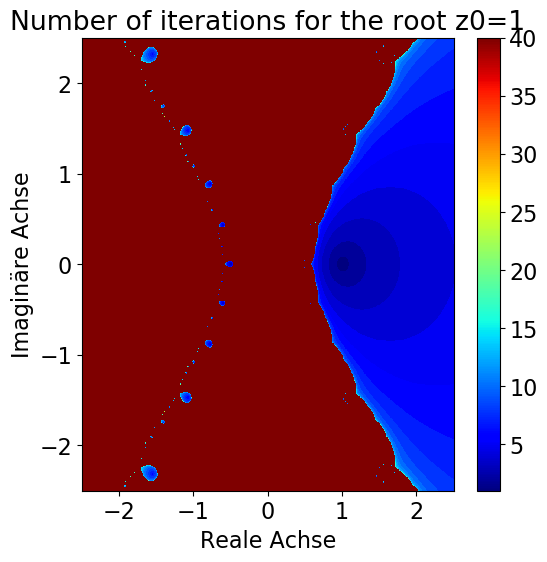

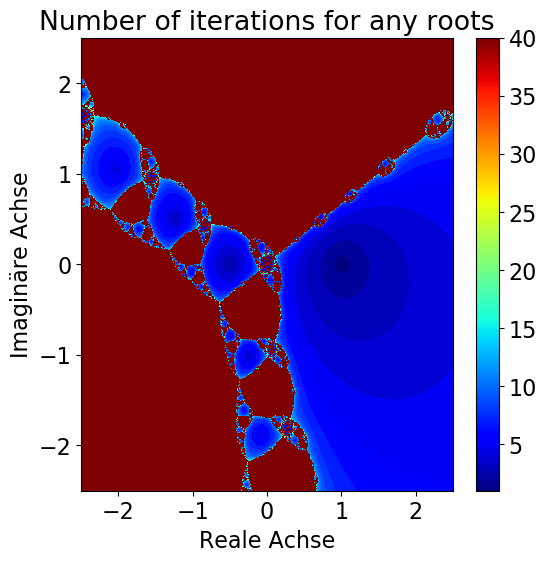

In [47]:
for Daten in [[werte_a_0.real,'Number of iterations for the root z0=1'],[werte_a_komplex.real,'Number of iterations for any roots']]:
    plt.figure(figsize = (6,6), dpi=100)
    plt.imshow(Daten[0],cmap='jet',interpolation = 'none',aspect ='auto',extent =[-size/2,size/2,-size/2,size/2]) # umbenennen des Plots für Colorbar
    plt.title(Daten[1])
    plt.ylabel('Imaginäre Achse')
    plt.xlabel('Reale Achse')
    plt.colorbar()
    plt.show()

# Aufgabe 3.4

$
\dfrac {\mathrm {d} ^{4}A(x)}{\mathrm {d} x^{4}} = \kappa ^4A(x) \\
\text{   verify that the general solution is correct: }\\ A(x) = a \cdot \mathrm{cos}(\kappa x) + b\cdot \mathrm{sin} (\kappa x) + c\cdot \mathrm{cosh}( \kappa x) + d \cdot\mathrm{sinh} (\kappa x)
$

$
\dfrac{\mathrm{d}^{4}}{\mathrm {d}x^{4}}A(x) = 
\dfrac{\mathrm{d}^{4}}{\mathrm {d}x^{4}}\big(a \cdot \mathrm{cos}(\kappa x) + b\cdot \mathrm{sin} (\kappa x) + c\cdot \mathrm{cosh}( \kappa x) + d \cdot\mathrm{sinh} (\kappa x)\big) \\=
\dfrac{\mathrm{d}^{3}}{\mathrm {d}x^{3}}\big( - a \cdot\kappa\cdot \mathrm{sin}(\kappa x) + b\cdot \kappa\cdot\mathrm{cos} (\kappa x) + c\cdot \kappa\cdot\mathrm{sinh}( \kappa x) + d \cdot\kappa\cdot\mathrm{cosh} (\kappa x)\big) \\=
\dfrac{\mathrm{d}^{2}}{\mathrm {d}x^{2}}\big( - a \cdot\kappa^2\cdot \mathrm{cos}(\kappa x) - b\cdot \kappa^2\cdot\mathrm{sin} (\kappa x) + c\cdot \kappa^2\cdot\mathrm{cosh}( \kappa x) + d \cdot\kappa^2\cdot\mathrm{sinh} (\kappa x)\big)  \\=
\dfrac{\mathrm{d}^{1}}{\mathrm {d}x^{1}}\big( a \cdot\kappa^3\cdot \mathrm{sin}(\kappa x) - b\cdot \kappa^3\cdot\mathrm{cos} (\kappa x) + c\cdot \kappa^3\cdot\mathrm{sinh}( \kappa x) + d \cdot\kappa^3\cdot\mathrm{cosh} (\kappa x)\big)  \\=
\dfrac{\mathrm{d}^{0}}{\mathrm {d}x^{0}}\big( a \cdot\kappa^4\cdot \mathrm{cos}(\kappa x) + b\cdot \kappa^4\cdot\mathrm{sin} (\kappa x) + c\cdot \kappa^4\cdot\mathrm{cosh}( \kappa x) + d \cdot\kappa^4\cdot\mathrm{sinh} (\kappa x)\big)  \\=
\kappa^4\big( a \cdot \mathrm{cos}(\kappa x) + b\cdot\mathrm{sin} (\kappa x) + c\cdot \mathrm{cosh}( \kappa x) + d \cdot\mathrm{sinh} (\kappa x)\big) \\=
\kappa^4 A(x)\\
$